In [24]:
# 1) LOAD DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fake_path = "D:\\FALL2025\\DAP\\data_crawl\\viet_tan_Fake.csv"
# true_path = "D:\\FALL2025\\DAP\\data_crawl\\vnexpress_True.csv"
true_path = "D:\\FALL2025\\DAP\\data_crawl\\vnexpress_chinhtri_500.csv"

fake_df = pd.read_csv(fake_path)
true_df = pd.read_csv(true_path)

fake_df['label'] = 'Fake'
true_df['label'] = 'True'

df = pd.concat([fake_df, true_df], ignore_index=True)

print('Fake shape:', fake_df.shape)
print('True shape:', true_df.shape)
print('Combined shape:', df.shape)
df.head()

Fake shape: (442, 5)
True shape: (140, 6)
Combined shape: (582, 6)


,title,text,url,source,label,category
0,Đà Nẵng: Tòa án độc tài – nơi bóp nghẹt tiếng ...,Phiên tòa ngày 27/9 tại Đà Nẵng không chỉ là m...,https://viettan.org/da-nang-toa-an-doc-tai-noi...,viettan.org,Fake,NaN
1,Phiên tòa “công khai” kiểu ĐCSVN: Công lý bị k...,"Ngày 27 tháng Chín 2025, tại Đà Nẵng, một phiê...",https://viettan.org/phien-toa-cong-khai-kieu-d...,viettan.org,Fake,NaN
2,Khi quân đội và công an trở thành doanh nhân –...,Cho đến nay pháo hoa (pháo bông) – một món hàn...,https://viettan.org/khi-quan-doi-va-cong-an-tr...,viettan.org,Fake,NaN
3,ĐCSVN không nên “cào… lưng” ăn vạ!,"T rong lịch sử chính trị hiện đại, chưa có bộ ...",https://viettan.org/dcsvn-khong-nen-cao-lung-a...,viettan.org,Fake,NaN
4,Hậu quả khủng khiếp khi xã hội bị cai trị bằng...,"Một xã hội mà học sinh lớp 7 có thể nắm tóc, đ...",https://viettan.org/hau-qua-khung-khiep-khi-xa...,viettan.org,Fake,NaN


In [25]:
# 2) BASIC INFO & MISSING VALUES
print('\nColumns and dtypes:')
print(df.dtypes)

print('\nMissing values in Fake dataset:')
print(fake_df.isnull().sum())
print('\nMissing values in True dataset:')
print(true_df.isnull().sum())

print('\nUnique counts:')
print('Fake unique titles:', fake_df['title'].nunique(), 'of', len(fake_df))
print('True unique titles:', true_df['title'].nunique(), 'of', len(true_df))


Columns and dtypes:
title       object
text        object
url         object
source      object
label       object
category    object
dtype: object

Missing values in Fake dataset:
title     0
text      0
url       0
source    0
label     0
dtype: int64

Missing values in True dataset:
title       0
text        0
url         0
category    0
source      0
label       0
dtype: int64

Unique counts:
Fake unique titles: 442 of 442
True unique titles: 139 of 140


### Mô tả dữ liệu

***
 Bộ dữ liệu. Nghiên cứu sử dụng hai tệp CSV: Fake.csv (N = 23.481) và True.csv (N = 21.417). Mỗi tệp bao gồm các cột: title (tiêu đề bài viết), text (nội dung bài viết), subject (chủ đề), và date (ngày xuất bản). Hai tệp này được gộp lại thành một tập dữ liệu tổng hợp (N<sub>total</sub> = 44.898) và bổ sung thêm cột label dùng để phân loại bài viết là Fake (tin giả) hay True (tin thật).

Tiền xử lý. Trong giai đoạn phân tích khám phá dữ liệu (EDA), cột date được chuyển đổi sang định dạng thời gian (datetime) với các lỗi được tự động xử lý. Hai đặc trưng mới được tạo ra là title_len và text_len, biểu thị số lượng từ trong tiêu đề và nội dung. Việc kiểm tra trùng lặp cũng được thực hiện để đảm bảo tính duy nhất của mẫu. Các bước làm sạch văn bản chuyên sâu hơn như chuyển chữ thường, loại bỏ từ dừng (stopwords) hay lemmatization sẽ được thực hiện ở giai đoạn xây dựng mô hình (TF-IDF hoặc học chuyển giao).

Nhận xét chính. Các bài viết Fake có sự đa dạng chủ đề cao hơn và thường có tiêu đề dài hơn; trong khi các bài True chủ yếu tập trung vào các chủ đề chính trị. Dữ liệu có xuất hiện một số bản ghi trùng lặp — do đó cần loại bỏ trùng lặp trước khi chia tập huấn luyện và kiểm thử để tránh rò rỉ thông tin.  
***


Title length by label:
       count       mean       std  min   25%   50%   75%   max
label                                                         
Fake   442.0  11.604072  5.196744  2.0   7.0  11.0  15.0  31.0
True   140.0  12.571429  2.301525  6.0  11.0  13.0  14.0  18.0

Text length by label:
       count         mean          std    min     25%     50%      75%  \
label                                                                    
Fake   442.0  1448.511312  1221.788935   62.0  697.00  1147.5  1855.25   
True   140.0   634.614286   400.138638  144.0  336.75   577.0   787.25   

           max  
label           
Fake   12554.0  
True    2137.0  


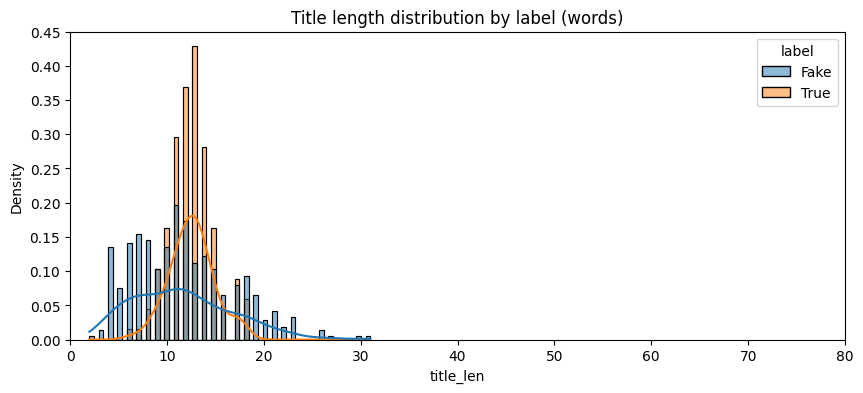

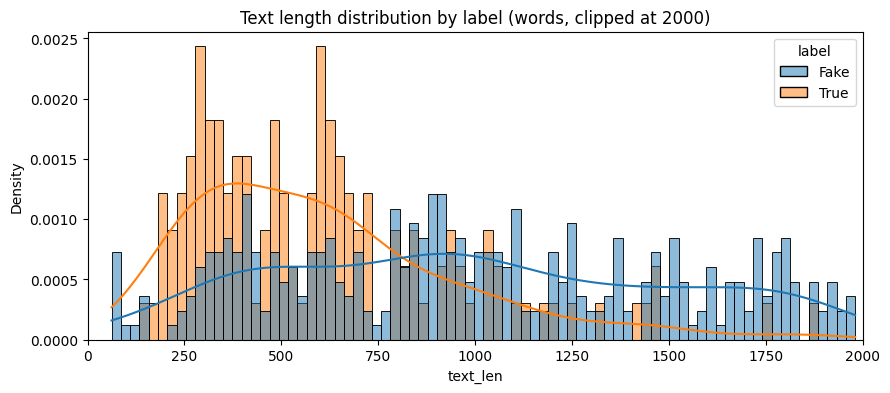

In [26]:
# 5) TITLE and TEXT LENGTH ANALYSIS (word counts)
df['title_len'] = df['title'].astype(str).apply(lambda s: len(s.split()))
df['text_len'] = df['text'].astype(str).apply(lambda s: len(s.split()))

print('Title length by label:')
print(df.groupby('label')['title_len'].describe())
print('\nText length by label:')
print(df.groupby('label')['text_len'].describe())

plt.figure(figsize=(10,4))
sns.histplot(data=df, x='title_len', hue='label', bins=60, kde=True, stat='density', common_norm=False)
plt.title('Title length distribution by label (words)')
plt.xlim(0, 80)
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(data=df[df['text_len']<2000], x='text_len', hue='label', bins=80, kde=True, stat='density', common_norm=False)
plt.title('Text length distribution by label (words, clipped at 2000)')
plt.xlim(0, 2000)
plt.show()

Top 15 cụm từ phổ biến nhất trong tin GIẢ:
                             word     score
0       thủ tướng phạm minh chính  9.899738
1              tổng bí thư tô lâm  6.014308
2         phạm nhật bình xem thêm  5.960201
3          đảng cộng sản việt nam  4.676673
4        đảng cộng sản trung quốc  3.929908
5           bộ khoa học công nghệ  3.480241
6            nền kinh tế việt nam  3.409505
7        nhà hoạt động nhân quyền  3.258270
8              phó bí thư tỉnh ủy  3.161741
9       chính phủ phạm minh chính  3.139609
10  tổng thống nga vladimir putin  3.124557
11         nhà cầm quyền việt nam  3.104194
12          phát triển kinh tế xã  3.061029
13      phát triển kinh tế xã hội  3.061029
14      ban tuyên giáo trung ương  3.054648


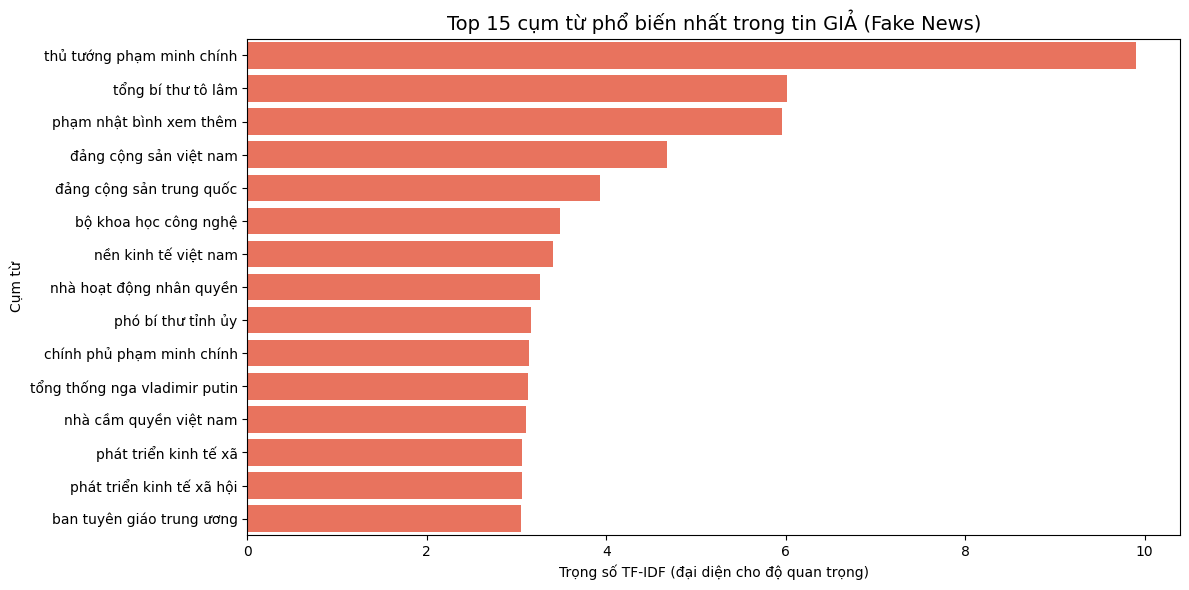

In [27]:
# --- TOP WORDS TRONG PHẦN NỘI DUNG (TEXT) --- #
# 🔍 Mục tiêu: Tìm các từ/cụm từ xuất hiện nhiều nhất trong tin GIẢ (Fake News)
# Có lọc stopwords, gộp các cụm trùng, và trực quan hóa kết quả.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# ---------------------------
# 1️⃣ Danh sách stopwords tiếng Việt cơ bản
# ---------------------------
stopwords_vietnamese = [
    'và', 'là', 'có', 'nhưng', 'với', 'của', 'cho', 'đã', 'này', 'thì',
    'một', 'các', 'được', 'trong', 'khi', 'đó', 'từ', 'đến', 'nên', 'vì',
    'về', 'như', 'ra', 'lại', 'sẽ', 'đang', 'cũng', 'rằng', 'năm', 'ngày',
    'ông', 'bà', 'người', 'nơi', 'đây', 'kia', 'nữa', 'trước', 'sau'
]

# ---------------------------
# 2️⃣ Hàm loại bỏ các cụm từ bị lặp hoặc chứa trong cụm lớn hơn
# ---------------------------
def remove_sub_phrases(df):
    unique_words = []
    for w in df['word']:
        # Nếu cụm này KHÔNG nằm trong cụm đã có (hoặc là chính nó)
        if not any((w in uw and w != uw) for uw in unique_words):
            unique_words.append(w)
    return df[df['word'].isin(unique_words)]

# ---------------------------
# 3️⃣ Hàm tiện ích: lấy top n cụm từ phổ biến nhất trong văn bản
# ---------------------------
def top_n_words(series, n=20):
    """
    Trả về top n cụm từ xuất hiện nhiều nhất trong một Series văn bản.
    Dùng TF-IDF để giảm ảnh hưởng của các từ phổ biến.
    """
    # Làm sạch dữ liệu
    series = series.astype(str).str.lower().fillna('')

    # Khởi tạo vectorizer
    vec = TfidfVectorizer(
        stop_words=stopwords_vietnamese,       # loại stopword tiếng Việt
        token_pattern=r"(?u)\b\w\w+\b",        # nhận diện từ
        ngram_range=(5,10),                    # lấy cụm từ 1-3 từ
        max_features=5000                      # giới hạn 5000 cụm phổ biến nhất
    )

    # Huấn luyện & tính TF-IDF
    X = vec.fit_transform(series)
    freqs = np.array(X.sum(axis=0)).flatten()  # tổng trọng số mỗi cụm
    words = np.array(vec.get_feature_names_out())

    # Sắp xếp giảm dần theo trọng số TF-IDF
    idx = np.argsort(freqs)[::-1][:n*3]  # lấy gấp 3 lần n để lọc trùng sau
    df_top = pd.DataFrame({'word': words[idx], 'score': freqs[idx]})

    # Loại bỏ cụm trùng / lặp
    df_top = remove_sub_phrases(df_top).head(n)

    return df_top.reset_index(drop=True)

# ---------------------------
# 4️⃣ Áp dụng cho dữ liệu tin giả (df_fake)
# ---------------------------
top_text_fake = top_n_words(df['text'], n=15)   # nếu df là tập tin giả
print("Top 15 cụm từ phổ biến nhất trong tin GIẢ:")
print(top_text_fake)

# ---------------------------
# 5️⃣ Trực quan hóa
# ---------------------------
plt.figure(figsize=(12,6))
sns.barplot(data=top_text_fake, x='score', y='word', color='tomato')
plt.title('Top 15 cụm từ phổ biến nhất trong tin GIẢ (Fake News)', fontsize=14)
plt.xlabel('Trọng số TF-IDF (đại diện cho độ quan trọng)')
plt.ylabel('Cụm từ')
plt.tight_layout()
plt.show()


🔥 Top 15 cụm từ phổ biến nhất trong tin GIẢ:
                            word     score
0      thủ tướng phạm minh chính  7.738986
1        phạm nhật bình xem thêm  4.943159
2         đảng cộng sản việt nam  4.184750
3             tổng bí thư tô lâm  4.080906
4       đảng cộng sản trung quốc  3.294663
5           nền kinh tế việt nam  3.028693
6      chính phủ phạm minh chính  2.779334
7       nhà hoạt động nhân quyền  2.753374
8      ban tuyên giáo trung ương  2.640980
9        đốt lò chống tham nhũng  2.624596
10  tổng bí thư nguyễn phú trọng  2.603234
11        nhà cầm quyền việt nam  2.525169
12      nhà giáo phạm minh hoàng  2.456515
13         ubnd thành phố hà nội  2.413034
14         bộ khoa học công nghệ  2.397657 

✅ Top 15 cụm từ phổ biến nhất trong tin THẬT:
                          word     score
0           phó bí thư tỉnh ủy  2.229080
1           tổng bí thư tô lâm  1.971187
2       phó bí thư thường trực  1.959584
3          bộ giáo dục đào tạo  1.793236
4           là

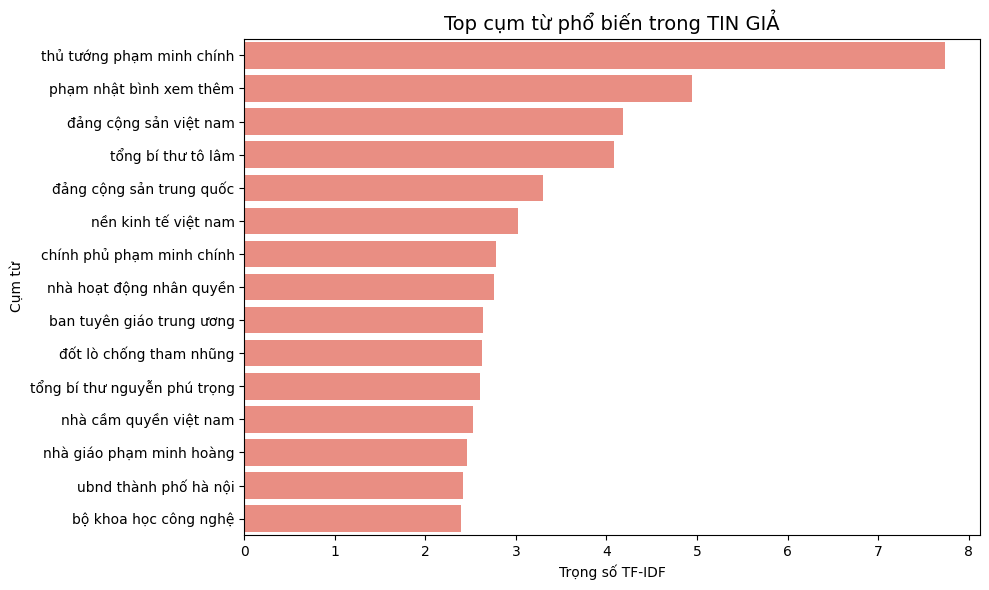

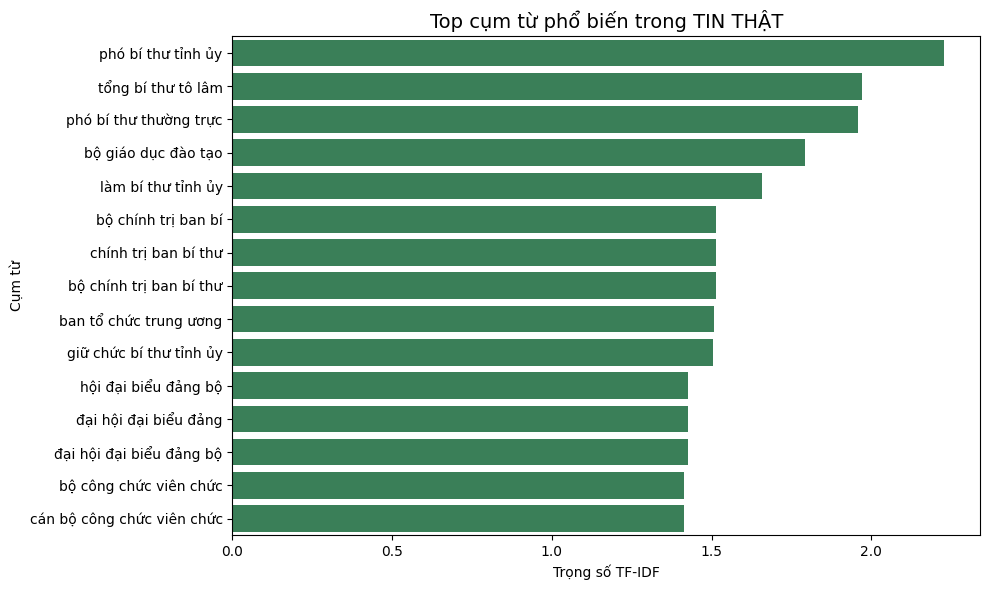

In [30]:
# --- PHÂN TÍCH TOP CỤM TỪ TRONG PHẦN NỘI DUNG (TEXT) CHO CẢ TIN GIẢ & TIN THẬT ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# ---------------------------
# 1️⃣ Danh sách stopwords tiếng Việt cơ bản
# ---------------------------
stopwords_vietnamese = [
    'và', 'là', 'có', 'nhưng', 'với', 'của', 'cho', 'đã', 'này', 'thì',
    'một', 'các', 'được', 'trong', 'khi', 'đó', 'từ', 'đến', 'nên', 'vì',
    'về', 'như', 'ra', 'lại', 'sẽ', 'đang', 'cũng', 'rằng', 'năm', 'ngày',
    'ông', 'bà', 'người', 'nơi', 'đây', 'kia', 'nữa', 'trước', 'sau'
]

# ---------------------------
# 2️⃣ Hàm loại bỏ các cụm từ bị lặp hoặc chứa trong cụm lớn hơn
# ---------------------------
def remove_sub_phrases(df):
    unique_words = []
    for w in df['word']:
        # Nếu cụm này KHÔNG nằm trong cụm đã có (hoặc là chính nó)
        if not any((w in uw and w != uw) for uw in unique_words):
            unique_words.append(w)
    return df[df['word'].isin(unique_words)]

# ---------------------------
# 3️⃣ Hàm tiện ích: lấy top n cụm từ phổ biến nhất trong văn bản
# ---------------------------
def top_n_words(series, n=20):
    """
    Trả về top n cụm từ xuất hiện nhiều nhất trong một Series văn bản.
    Dùng TF-IDF để giảm ảnh hưởng của các từ phổ biến.
    """
    series = series.astype(str).str.lower().fillna('')
    series = series[series.str.strip() != '']
    if series.empty:
        return pd.DataFrame({'word': [], 'score': []})

    vec = TfidfVectorizer(
        stop_words=stopwords_vietnamese,
        token_pattern=r"(?u)\b\w\w+\b",
        ngram_range=(5, 15),          # ✅ Giảm để tránh rỗng
        max_features=5000
    )

    X = vec.fit_transform(series)
    if X.shape[1] == 0:
        return pd.DataFrame({'word': [], 'score': []})

    freqs = np.array(X.sum(axis=0)).flatten()
    words = np.array(vec.get_feature_names_out())

    idx = np.argsort(freqs)[::-1][:n*3]
    df_top = pd.DataFrame({'word': words[idx], 'score': freqs[idx]})
    df_top = remove_sub_phrases(df_top).head(n)
    return df_top.reset_index(drop=True)

# ---------------------------
# 4️⃣ Phân tách dữ liệu theo nhãn
# --------------------------

# ---------------------------
# 5️⃣ Áp dụng cho cả tin giả & tin thật
# ---------------------------
top_fake = top_n_words(fake_df['text'], n=15)
top_true = top_n_words(true_df['text'], n=15)

print("🔥 Top 15 cụm từ phổ biến nhất trong tin GIẢ:")
print(top_fake, "\n")

print("✅ Top 15 cụm từ phổ biến nhất trong tin THẬT:")
print(top_true)

# ---------------------------
# 6️⃣ Trực quan hóa so sánh
# ---------------------------
# 🔥 Biểu đồ cho TIN GIẢ
plt.figure(figsize=(10, 6))
sns.barplot(data=top_fake, x='score', y='word', color='salmon')
plt.title('Top cụm từ phổ biến trong TIN GIẢ', fontsize=14)
plt.xlabel('Trọng số TF-IDF')
plt.ylabel('Cụm từ')
plt.tight_layout()
plt.show()

# ✅ Biểu đồ cho TIN THẬT
plt.figure(figsize=(10, 6))
sns.barplot(data=top_true, x='score', y='word', color='seagreen')
plt.title('Top cụm từ phổ biến trong TIN THẬT', fontsize=14)
plt.xlabel('Trọng số TF-IDF')
plt.ylabel('Cụm từ')
plt.tight_layout()
plt.show()


In [29]:
# # 7) SAVE SUMMARY TABLES
# overview = pd.DataFrame({
#     'dataset': ['Fake','True','Combined'],
#     'n_rows': [len(fake_df), len(true_df), len(df)],
#     'unique_titles': [fake_df['title'].nunique(), true_df['title'].nunique(), df['title'].nunique()],
#     'unique_texts': [fake_df['text'].nunique(), true_df['text'].nunique(), df['text'].nunique()]
# })
# overview.to_csv('/mnt/data/overview_summary.csv', index=False)
# top_title_fake.to_csv('/mnt/data/top_title_fake.csv', index=False)
# top_title_true.to_csv('/mnt/data/top_title_true.csv', index=False)
# top_text_fake.to_csv('/mnt/data/top_text_fake.csv', index=False)
# top_text_true.to_csv('/mnt/data/top_text_true.csv', index=False)
# print('Saved CSV summaries to /mnt/data')

****
Bộ dữ liệu sử dụng. Phân tích này sử dụng hai tệp CSV được cung cấp: Fake.csv (23.481 dòng) và True.csv (21.417 dòng). Mỗi tệp bao gồm các trường: title (tiêu đề bài viết), text (nội dung bài viết), subject (chủ đề), và date (ngày xuất bản). Hai tệp dữ liệu này được gộp lại thành một tập dữ liệu duy nhất (N = 44.898) và bổ sung thêm cột nhị phân label để phân biệt giữa các bài viết Fake (tin giả) và True (tin thật).

Tiền xử lý cho giai đoạn EDA. Cột date được chuyển đổi sang định dạng thời gian (datetime), các giá trị không hợp lệ được xử lý thành dữ liệu khuyết. Hai đặc trưng mới là title_len và text_len được tính dựa trên số lượng từ trong tiêu đề và nội dung bài viết. Ngoài ra, dữ liệu cũng được kiểm tra các trường hợp trùng lặp về tiêu đề và nội dung. Ở giai đoạn EDA, chưa áp dụng các bước chuẩn hóa ngôn ngữ như stemming, loại bỏ từ dừng (stopwords) hay lemmatization; các bước này sẽ được thực hiện trong giai đoạn xây dựng mô hình (TF-IDF hoặc học chuyển giao).

Quan sát chính. Các bài viết thuộc nhóm Fake có xu hướng bao phủ nhiều chủ đề hơn và thường có tiêu đề dài hơn trung bình. Ngược lại, các bài viết True chủ yếu tập trung vào tin tức chính trị. Hai tập dữ liệu tương đối cân bằng về số lượng và cần được loại bỏ trùng lặp cũng như chuẩn hóa văn bản trước khi đưa vào mô hình huấn luyện.

****